# Analyse Exploratoire

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

In [2]:
pd.set_option('display.max_row',918)
pd.set_option('display.max_column',12)

In [3]:
missing_values = ["n/a", "NaN", "--"]
df = pd.read_excel('Dataset.xlsx', na_values = missing_values)
df.head(15)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [4]:
df = df.rename(columns={'TDT': 'Douleur_Thoracique','PAR':'Pression_Arterielle','GAJ':'Glycémie','ECG':'Electrocardiogramme','FCMAX':'Frequence_Cardiaque_Max'})

In [5]:
df['Douleur_Thoracique']= df['Douleur_Thoracique'].replace({'AT':'angine_typique','AA':'angine atypique','DNA':'douleur_non_angineuse','ASY':'asymptomatique'})
df['Electrocardiogramme']= df['Electrocardiogramme'].replace({'ST':'Anomalie_ST','HVG':'hypertrophie_ventriculaire_gauche'})
df.head(15)

,AGE,SEXE,Douleur_Thoracique,Pression_Arterielle,CHOLESTEROL,Glycémie,Electrocardiogramme,Frequence_Cardiaque_Max,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,angine atypique,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,douleur_non_angineuse,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,angine atypique,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,asymptomatique,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,douleur_non_angineuse,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,douleur_non_angineuse,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,angine atypique,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,angine atypique,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,asymptomatique,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,angine atypique,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      918 non-null    int64  
 1   SEXE                     918 non-null    object 
 2   Douleur_Thoracique       918 non-null    object 
 3   Pression_Arterielle      918 non-null    int64  
 4   CHOLESTEROL              918 non-null    int64  
 5   Glycémie                 918 non-null    int64  
 6   Electrocardiogramme      918 non-null    object 
 7   Frequence_Cardiaque_Max  918 non-null    int64  
 8   ANGINE                   918 non-null    object 
 9   DEPRESSION               918 non-null    float64
 10  PENTE                    918 non-null    object 
 11  CŒUR                     918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [7]:
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

## Visualisons des variables 

### Variables Quantitatives

In [8]:
Data_Quanti = df.select_dtypes(exclude=object)
Data_Quali = df.select_dtypes(object)

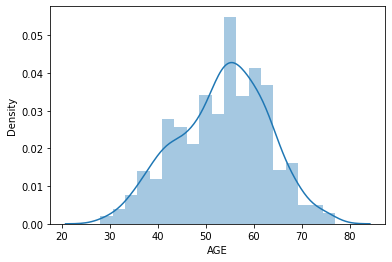

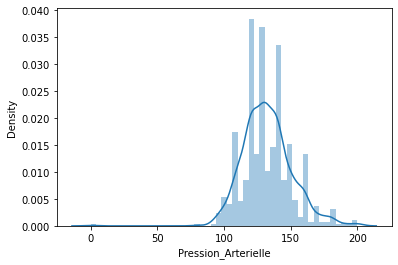

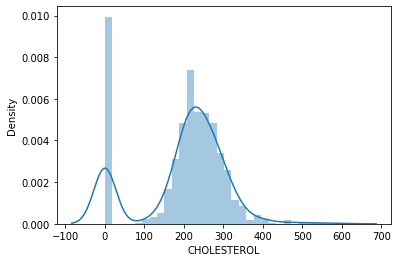

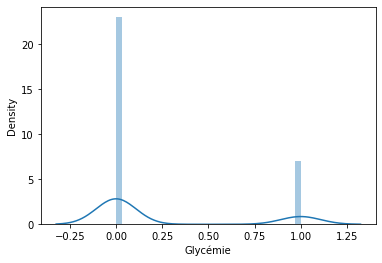

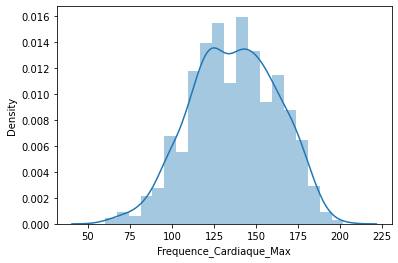

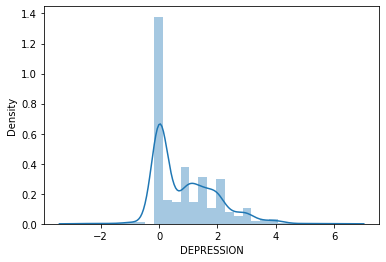

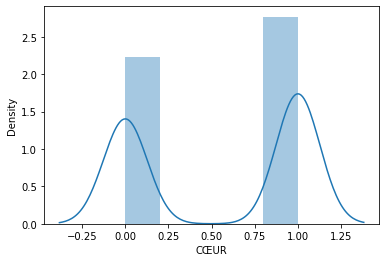

In [10]:
for col in Data_Quanti:
    plt.figure()
    sns.distplot(df[col])

In [11]:
for col in Data_Quanti:
    print(f"{shapiro(df[col])}\n")

ShapiroResult(statistic=0.9910159707069397, pvalue=2.1749523511971347e-05)

ShapiroResult(statistic=0.9580422639846802, pvalue=1.4945345782886414e-15)

ShapiroResult(statistic=0.8705924153327942, pvalue=6.972669126282614e-27)

ShapiroResult(statistic=0.5234582424163818, pvalue=3.783505853677006e-44)

ShapiroResult(statistic=0.992672860622406, pvalue=0.00016854831483215094)

ShapiroResult(statistic=0.8598771095275879, pvalue=8.269326883616587e-28)

ShapiroResult(statistic=0.6324208974838257, pvalue=2.3473991354983606e-40)



**************************************************

### Variables Qualitatives

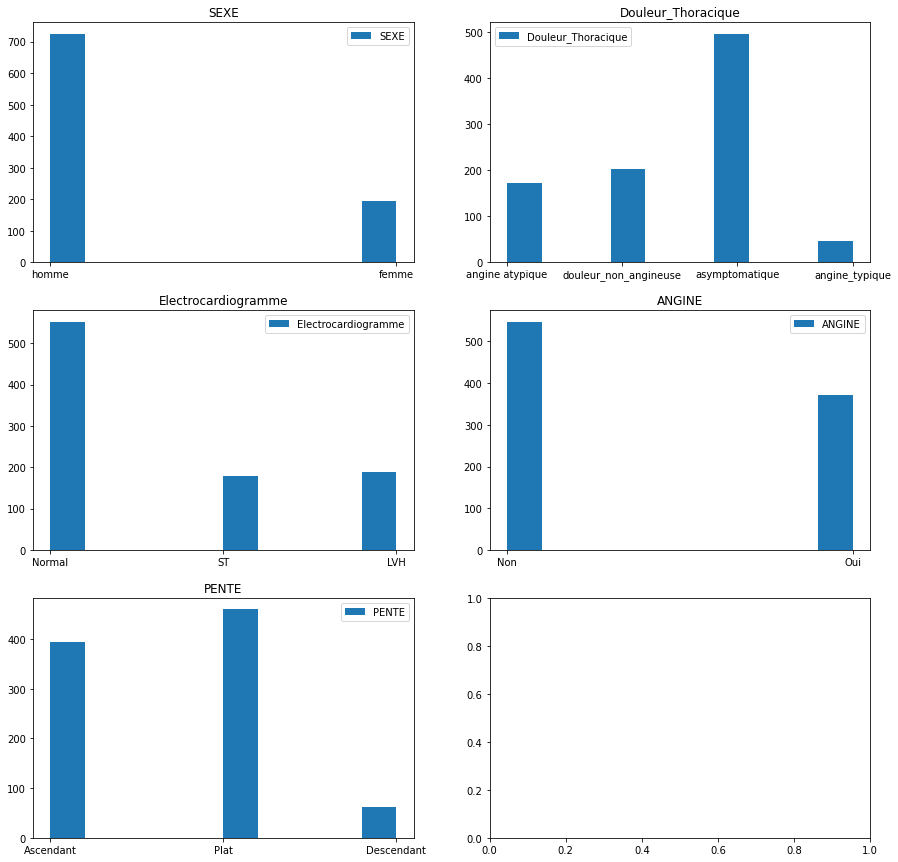

In [14]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.SEXE, label = "SEXE")
ax[0, 0].set_title("SEXE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.Douleur_Thoracique, label = "Douleur_Thoracique")
ax[0, 1].set_title("Douleur_Thoracique", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.Electrocardiogramme,label = "Electrocardiogramme")
ax[1, 0].set_title("Electrocardiogramme", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.ANGINE, label = "ANGINE")
ax[1, 1].set_title("ANGINE", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.PENTE, label = "PENTE")
ax[2, 0].set_title("PENTE", size = 12)
ax[2, 0].legend()

plt.show()

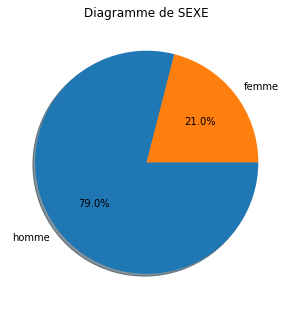

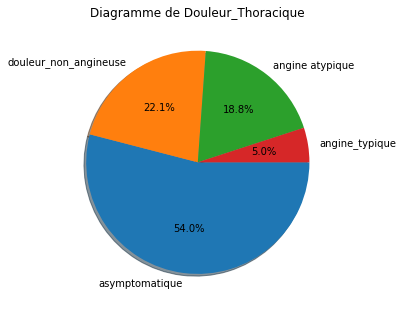

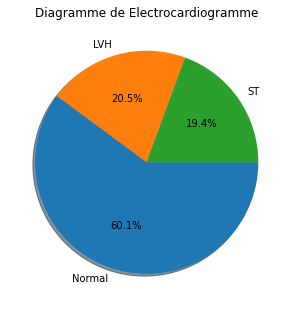

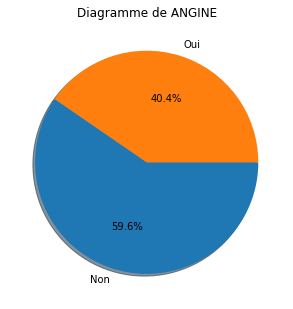

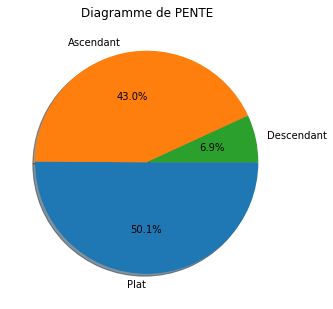

In [15]:
for col in Data_Quali:
    plt.figure(figsize=(5, 8))
    count = df[col].value_counts()
    plt.pie(count.values, labels=count.index, autopct='%1.1f%%',
            counterclock=False, shadow=True)
    plt.title(f'Diagramme de {col}')

    plt.show()

****************************************************

### Variables Quantitatives-Quantitatives

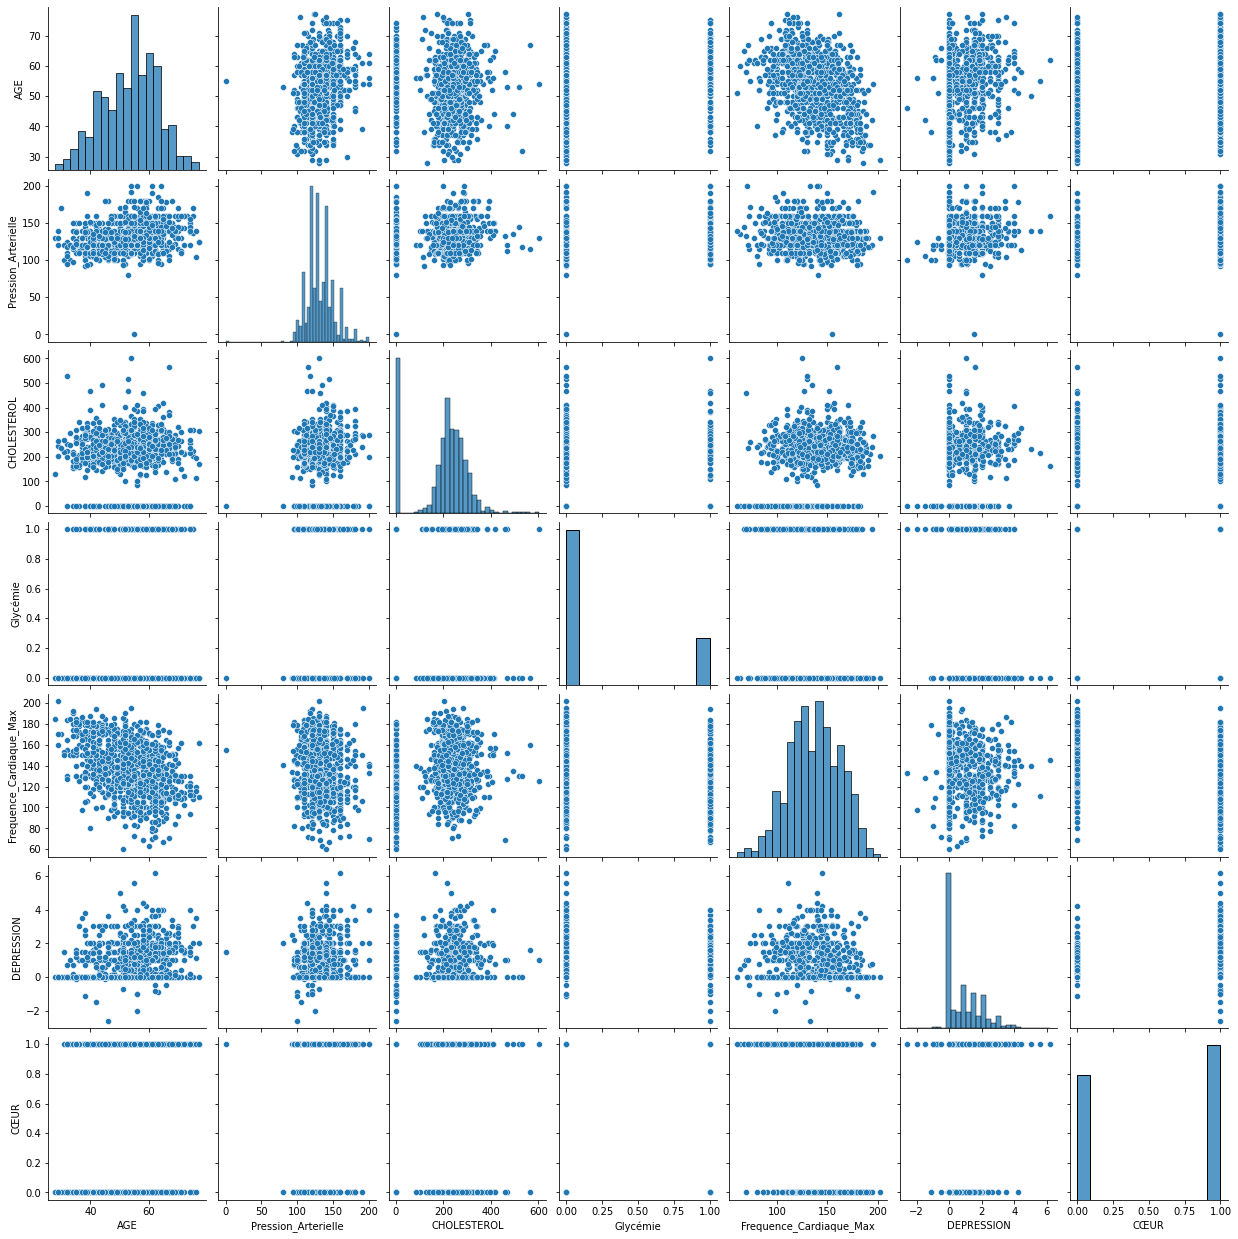

In [16]:
sns.pairplot(df)

**************************************************

### Variables Quantitatives-Qualitatives

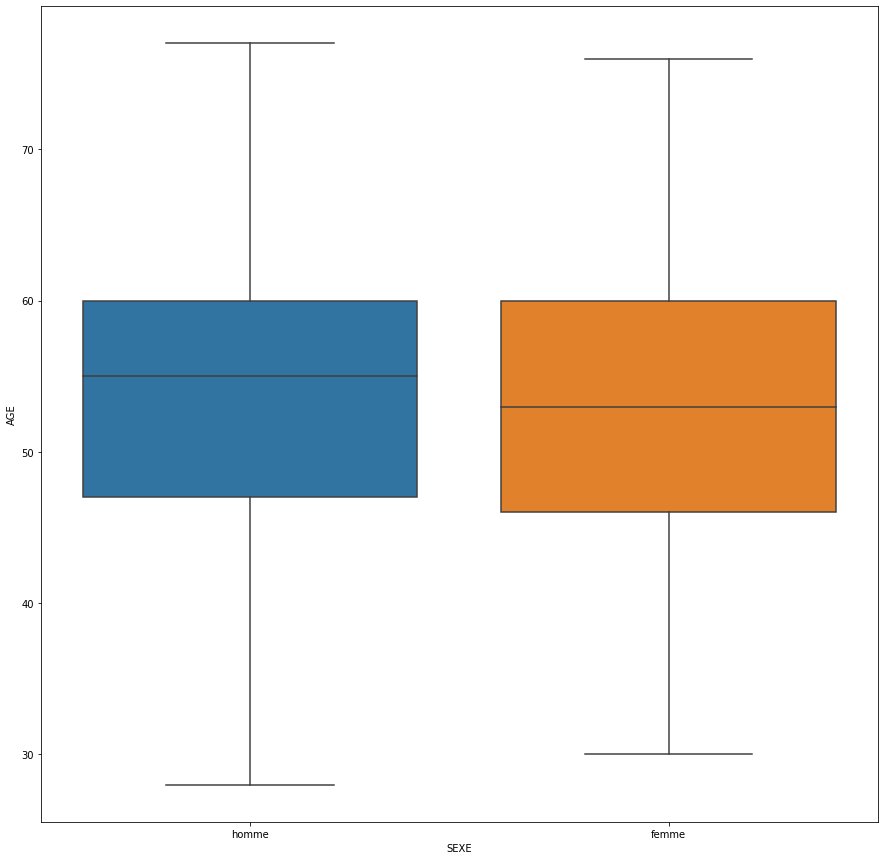

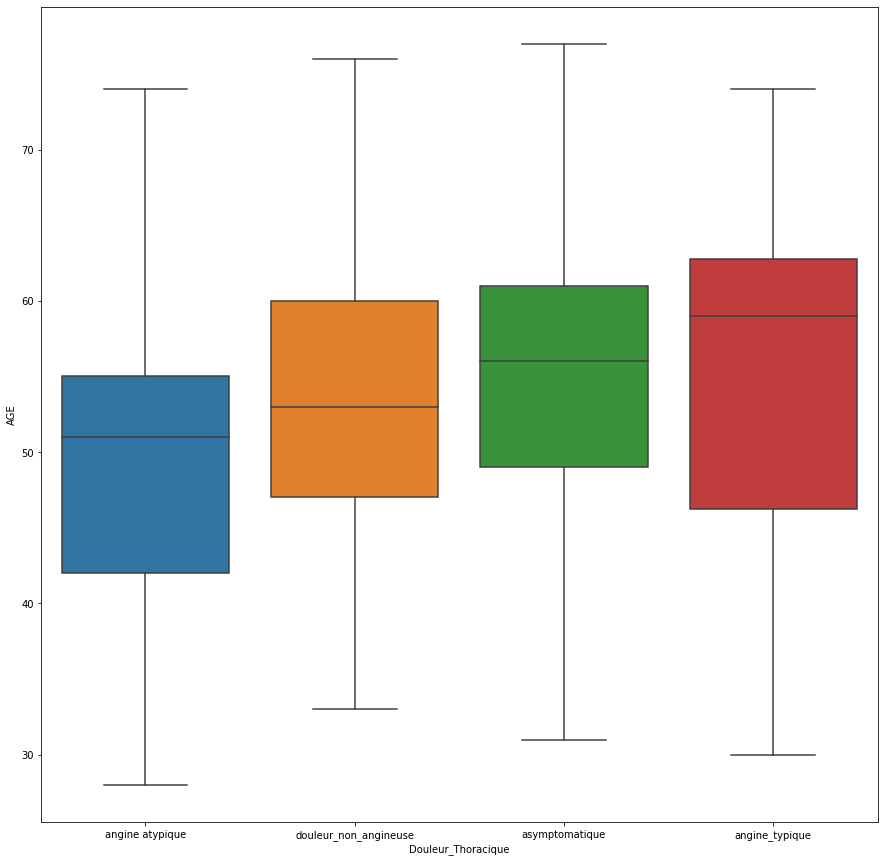

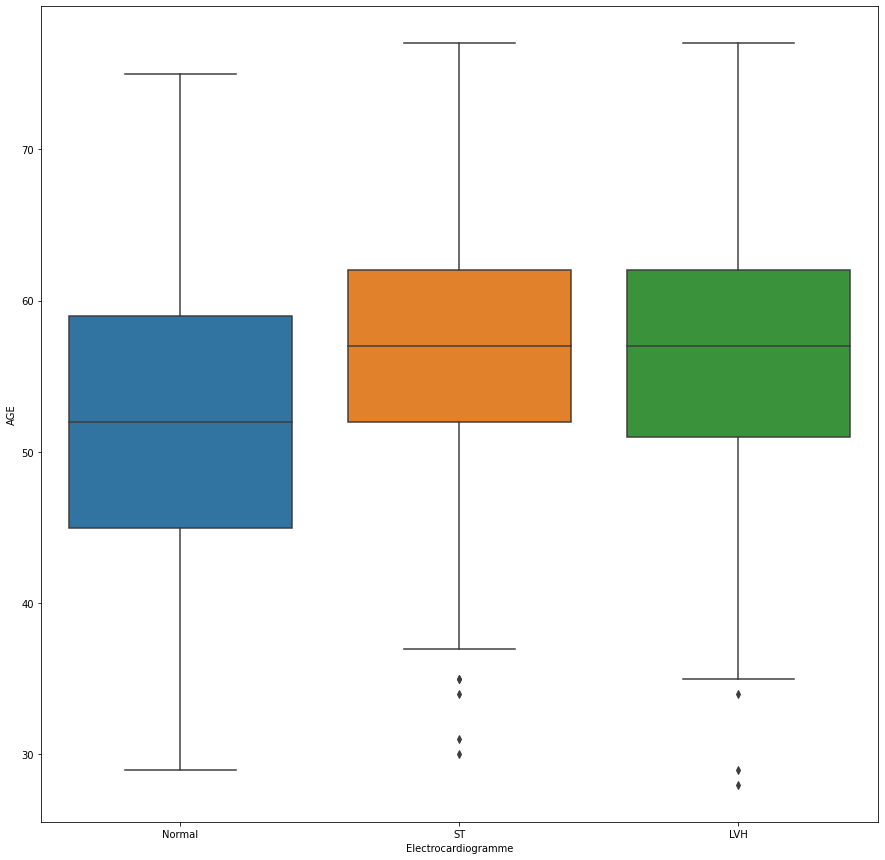

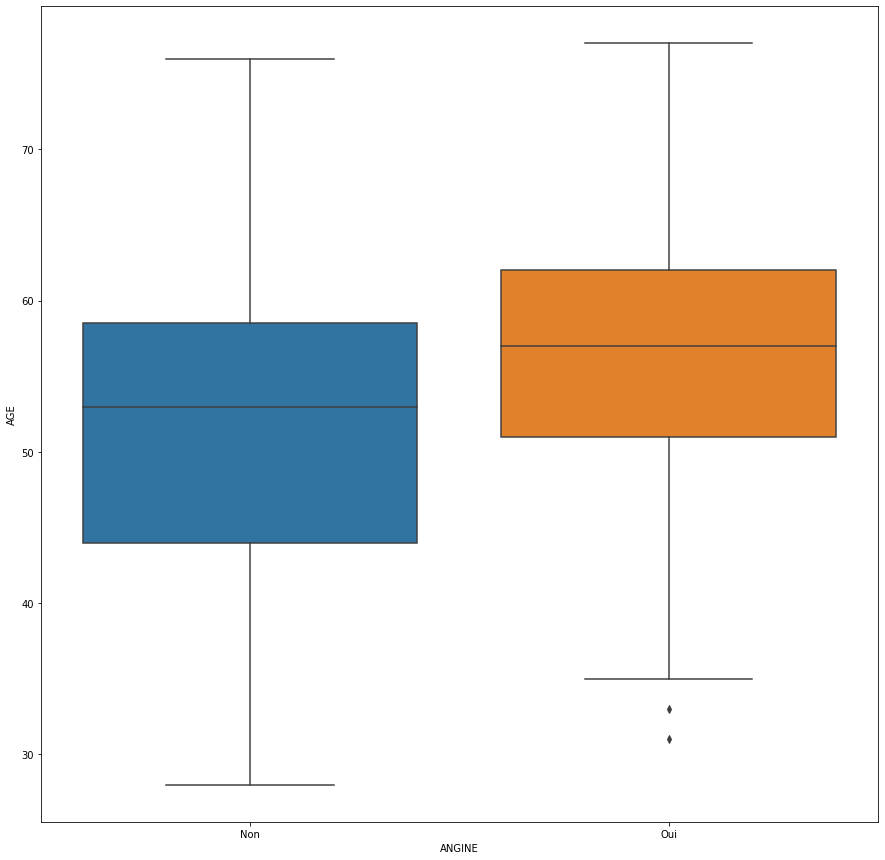

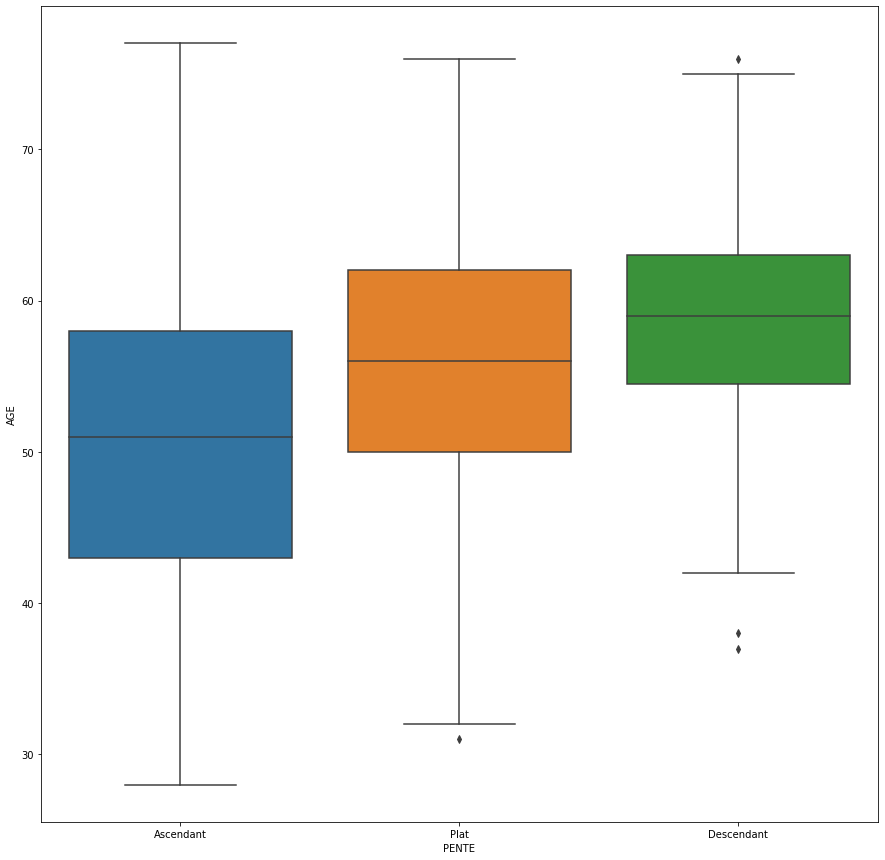

In [17]:
for i in Data_Quali:
    sns.boxplot(y="AGE", x=i, data=df)
    plt.show()

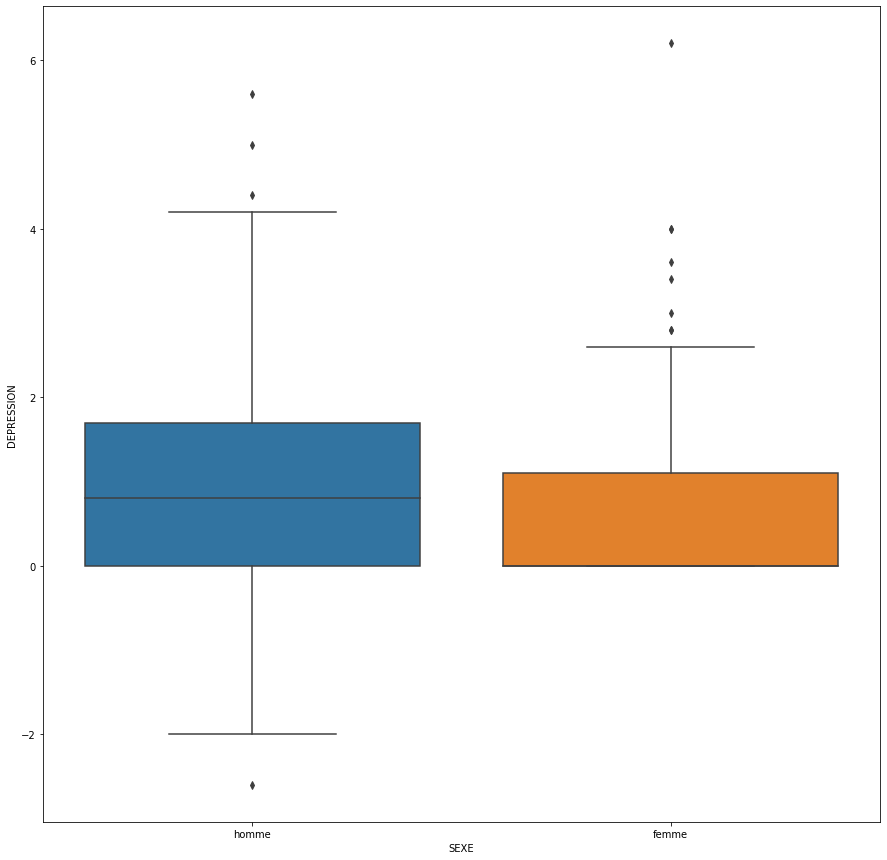

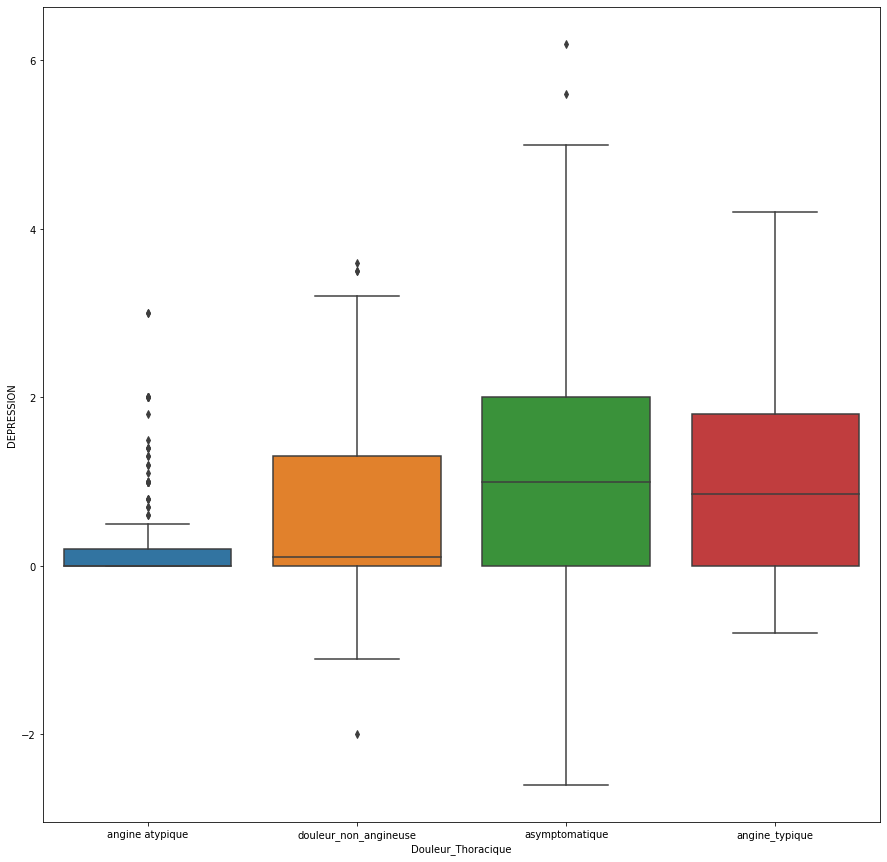

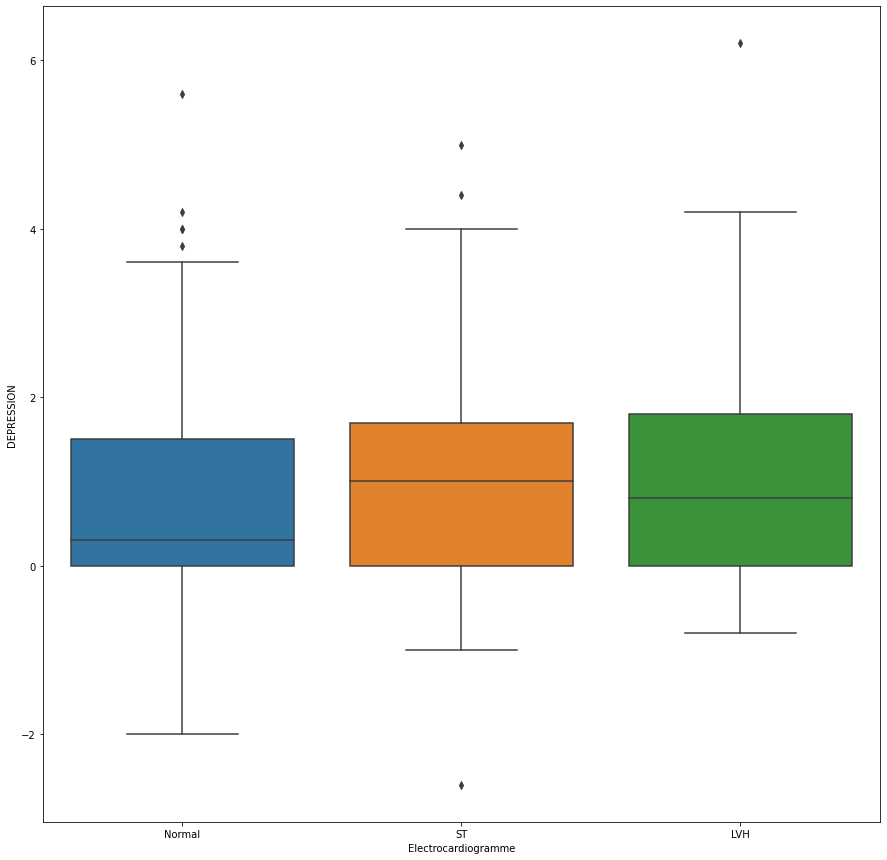

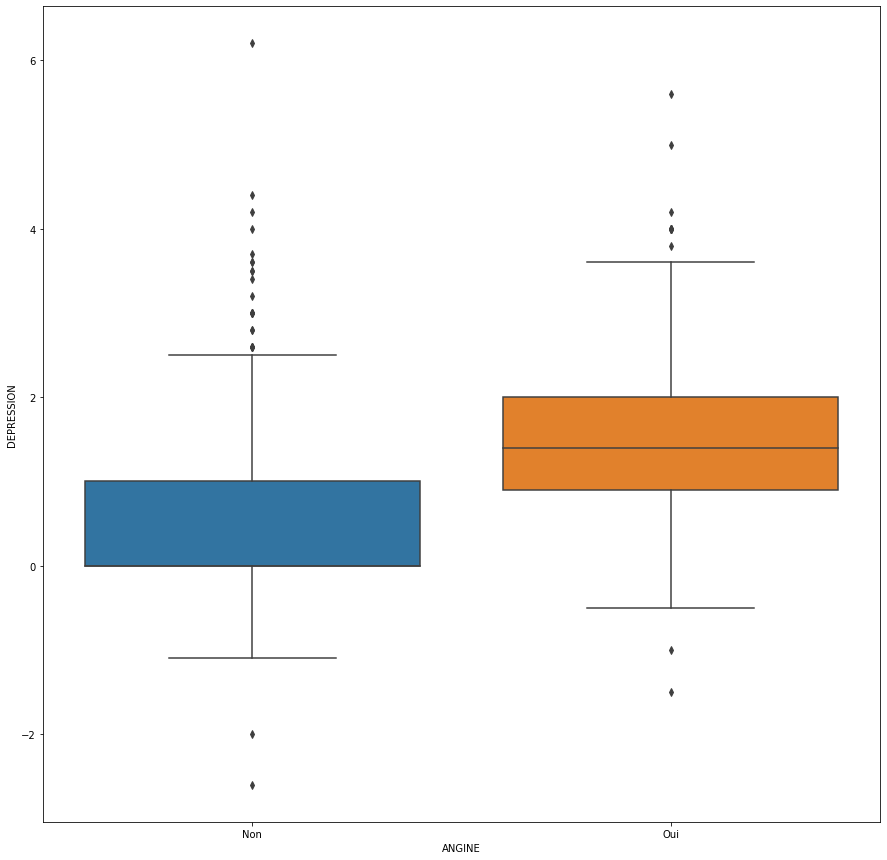

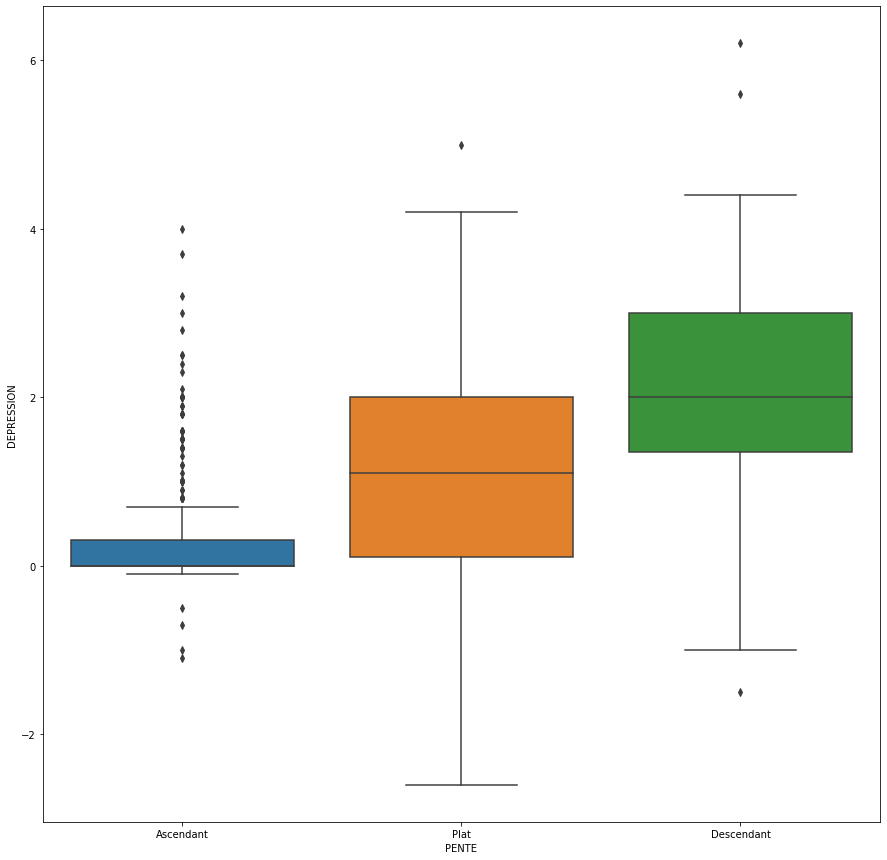

In [18]:
for i in Data_Quali:
    sns.boxplot(y="DEPRESSION", x=i, data=df)
    plt.show()

*****************************************************

### Visualisons la variable cible

In [20]:
df['CŒUR'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: CŒUR, dtype: float64

In [28]:
Malade_df = df[df['CŒUR'] == 1]
Sein_df = df[df['CŒUR'] == 0]

<AxesSubplot:xlabel='CŒUR', ylabel='Density'>

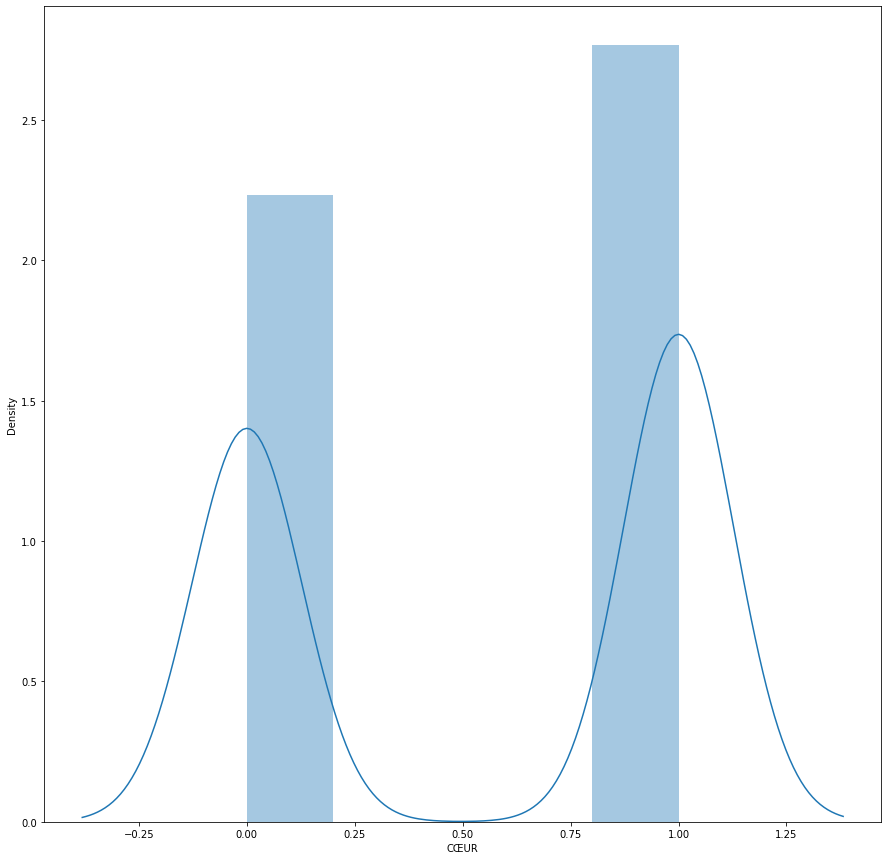

In [21]:
plt.figure()
sns.distplot(df['CŒUR'])

Text(0.5, 1.0, 'Diagramme de PENTE')

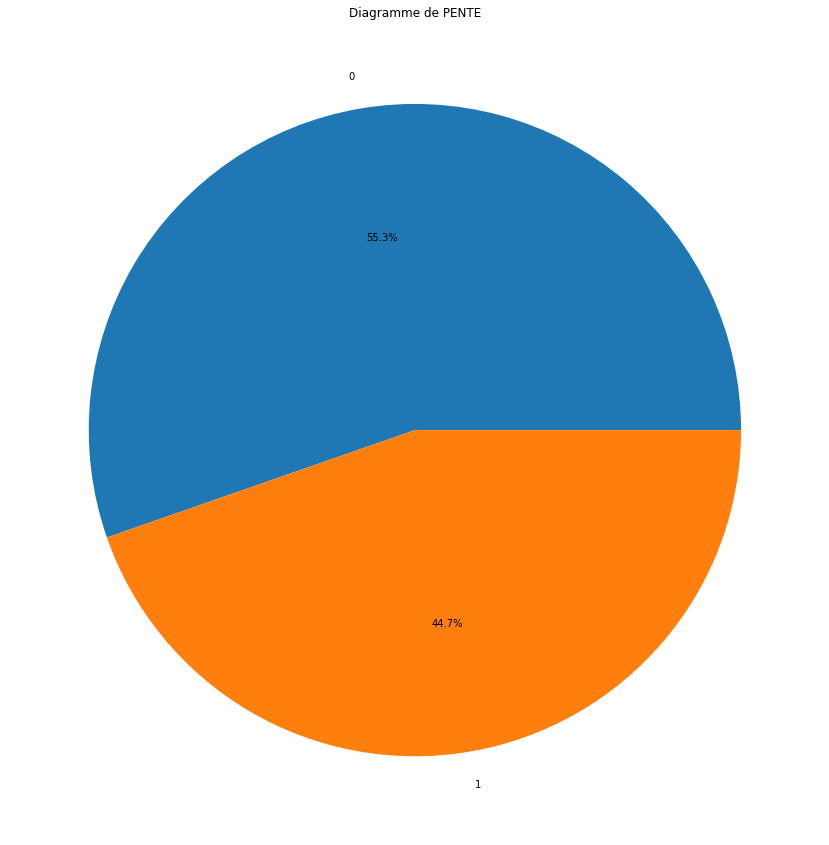

In [22]:
plt.figure()
plt.pie(df['CŒUR'].value_counts(), labels=df['CŒUR'].unique(), autopct='%.1f%%')
plt.title("Diagramme de " + col)

***********************************************************************************************

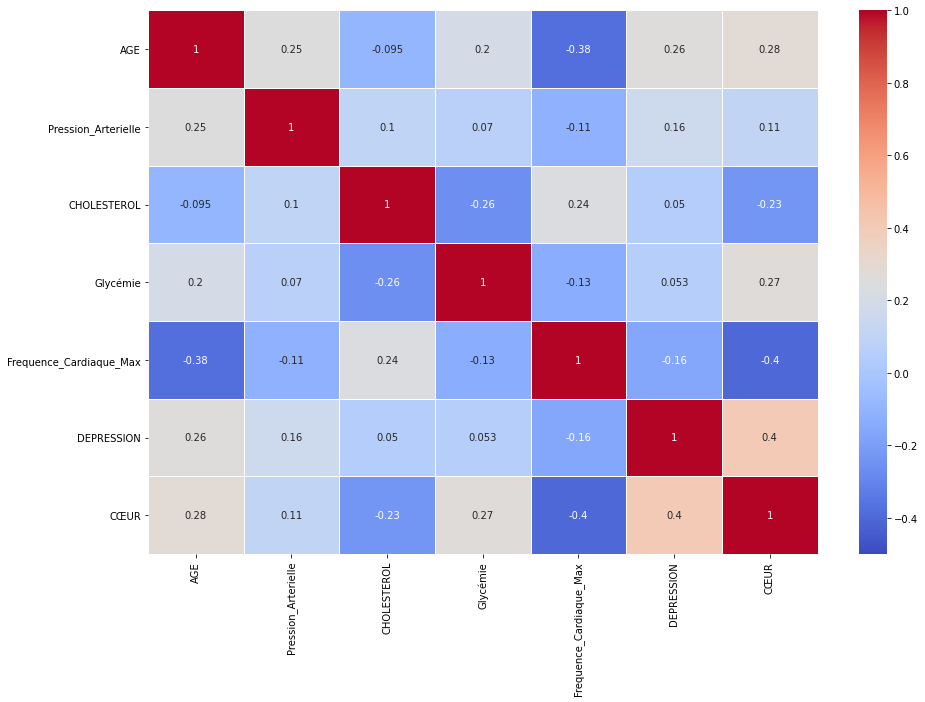

In [23]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

***************************************************

### Visualisons la rélation entre les variables quantitatives et la variable cible

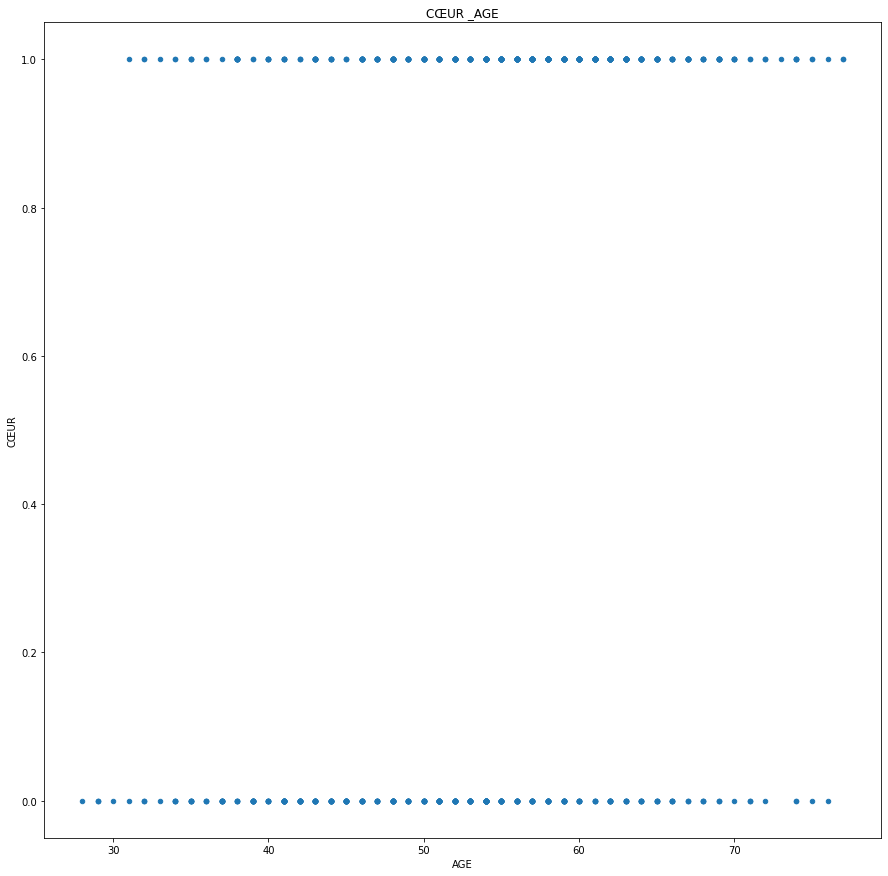

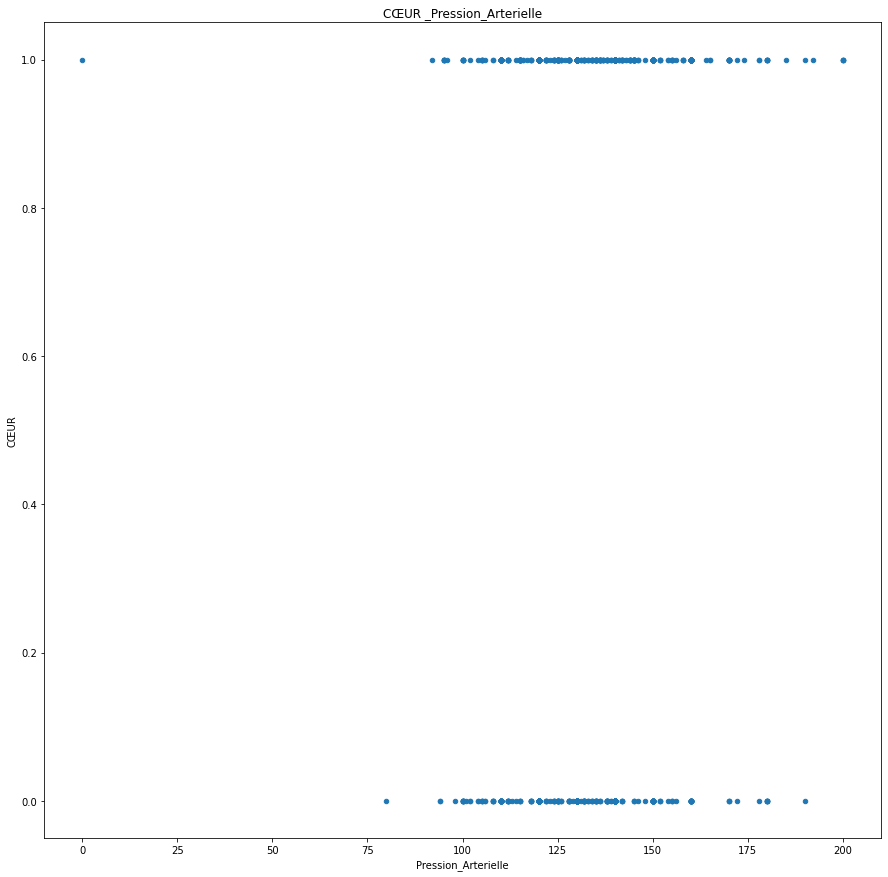

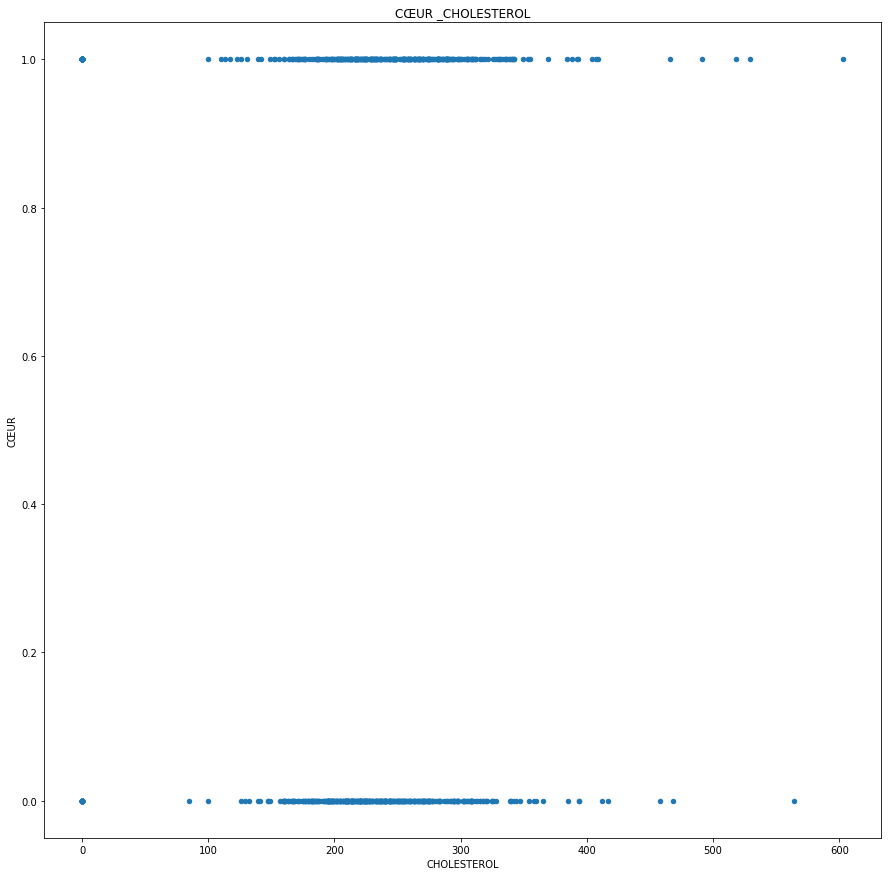

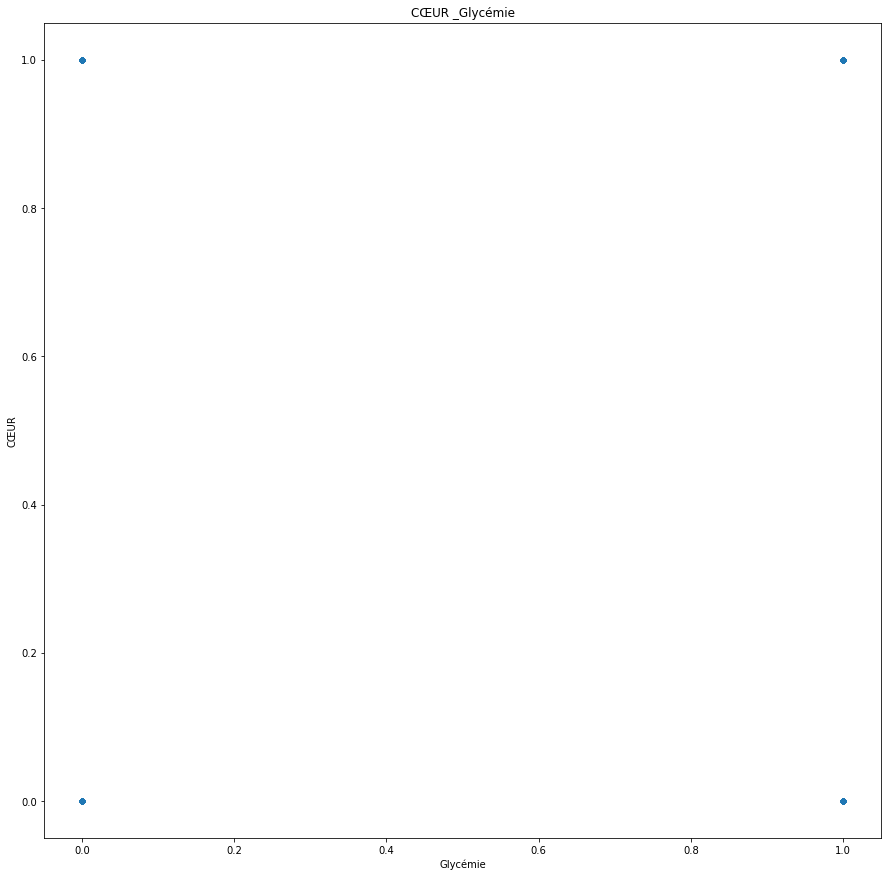

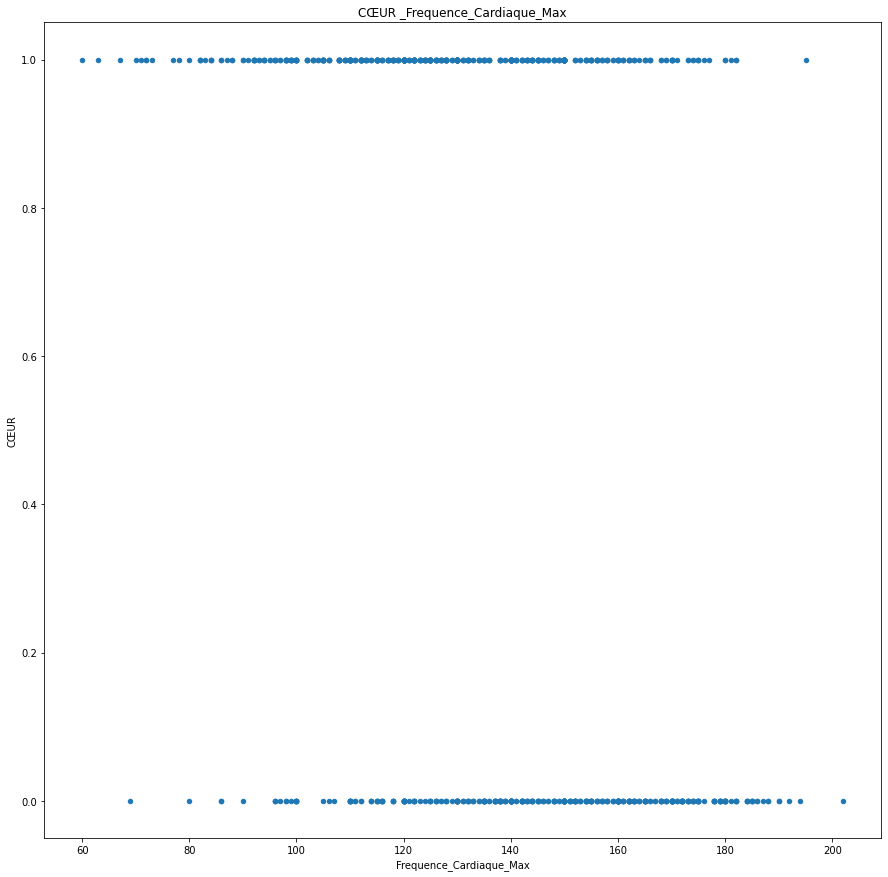

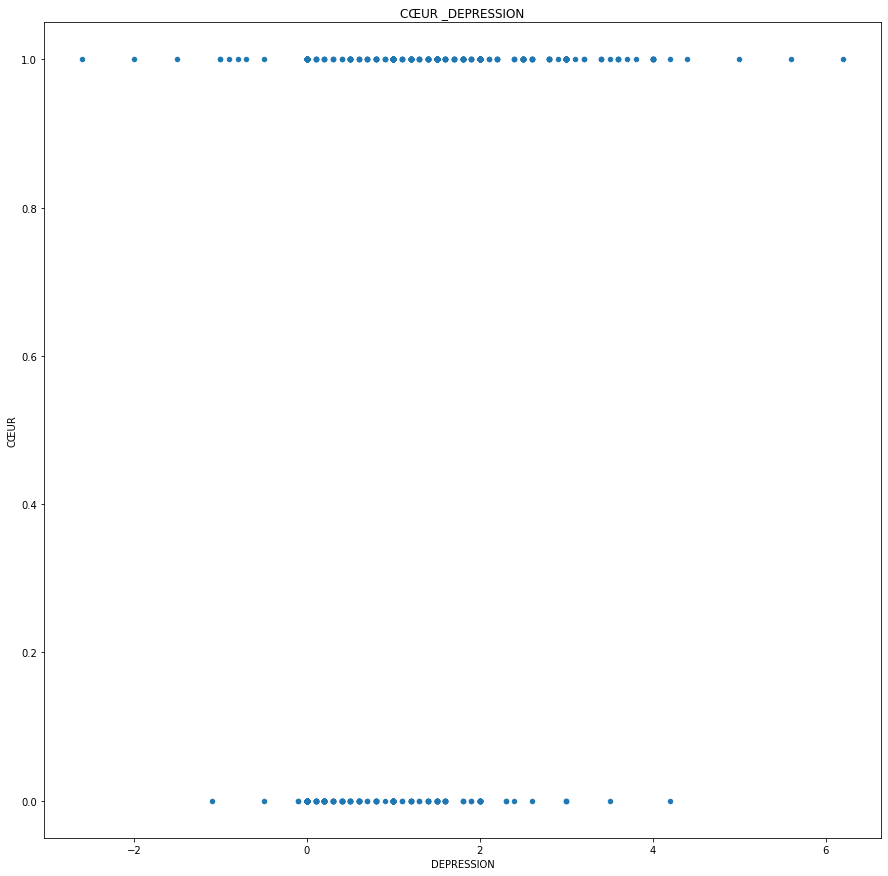

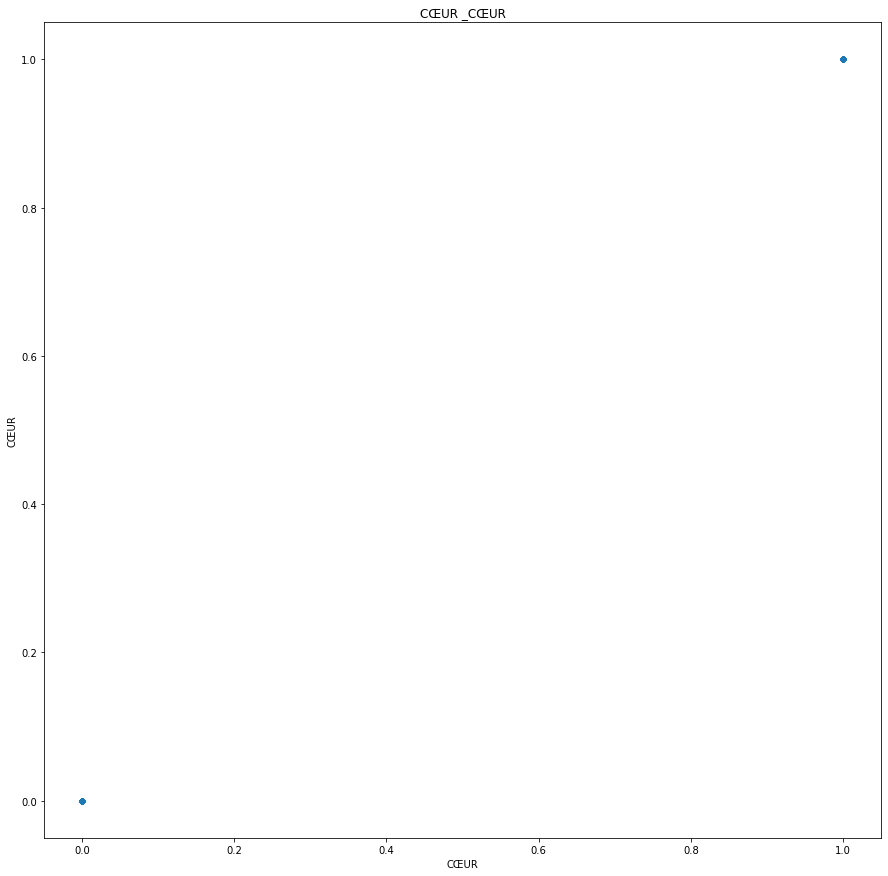

In [25]:
for col in Data_Quanti.columns:
    Data_Quanti.plot.scatter(x=col, y='CŒUR')
    plt.title(f'CŒUR _{col}')
    plt.show()

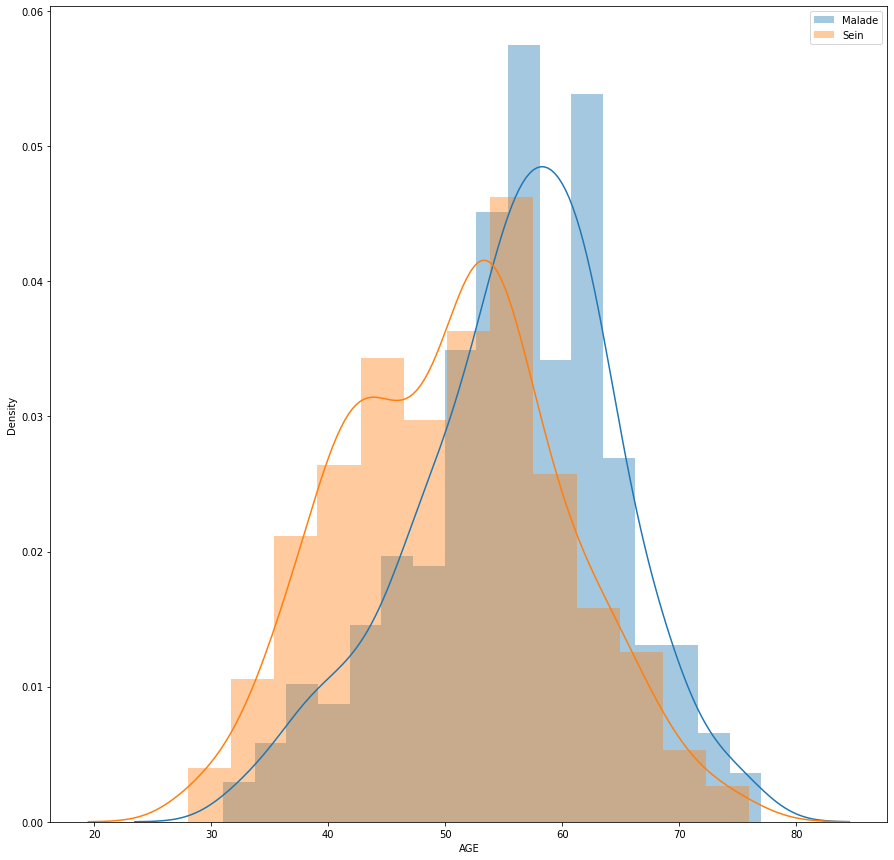

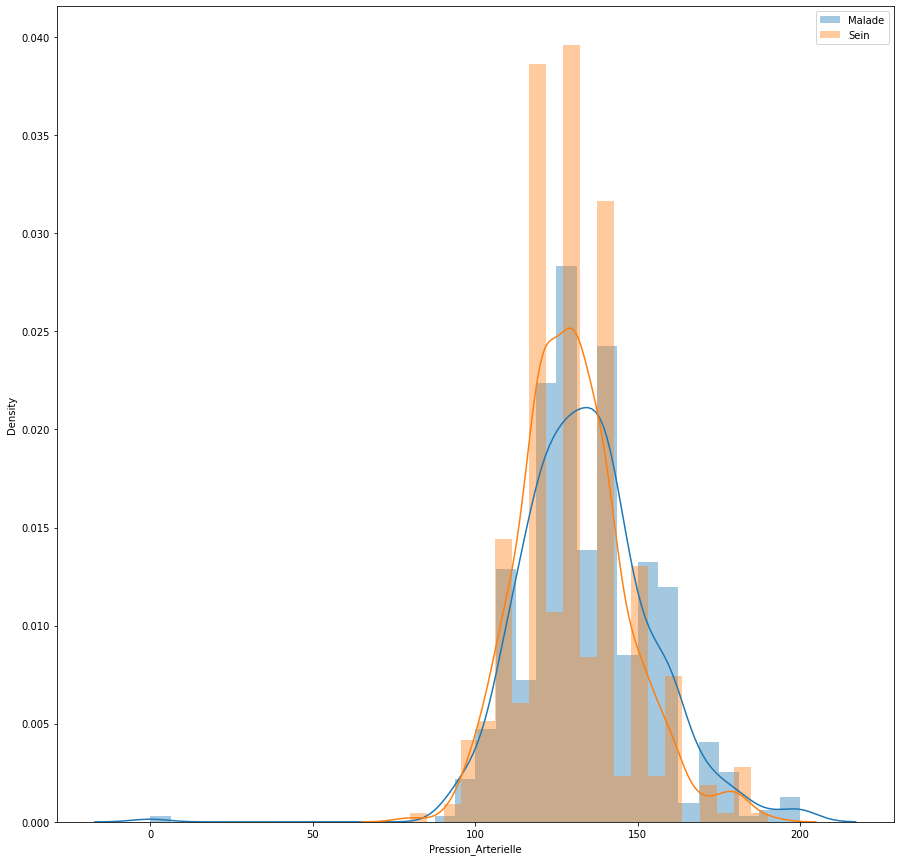

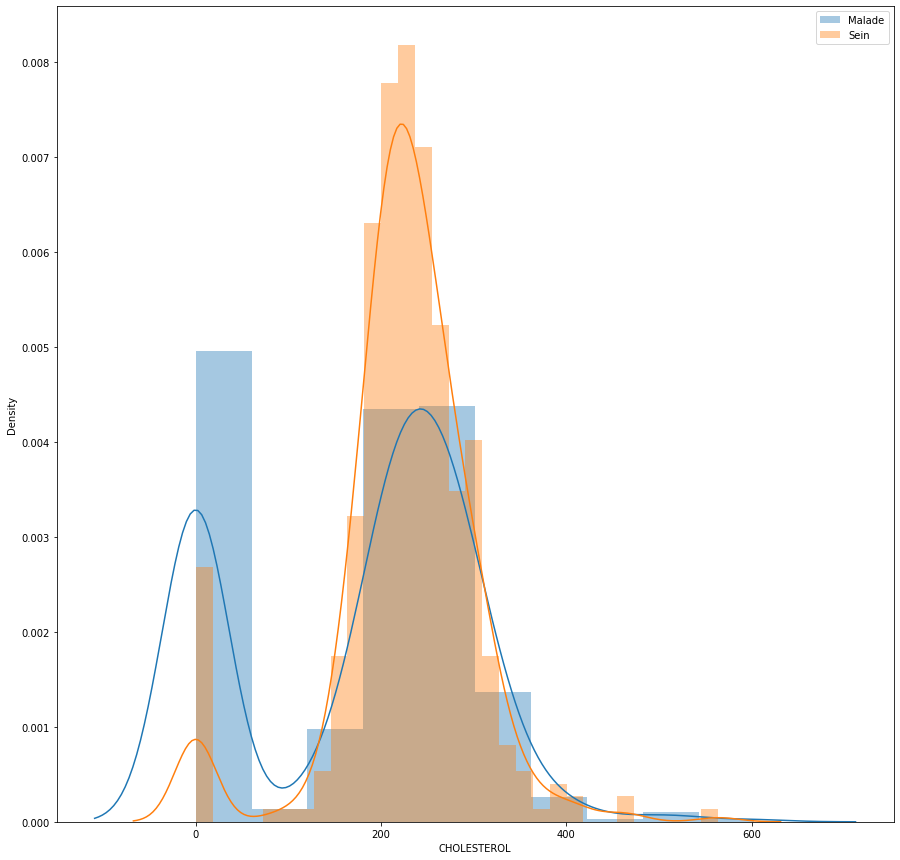

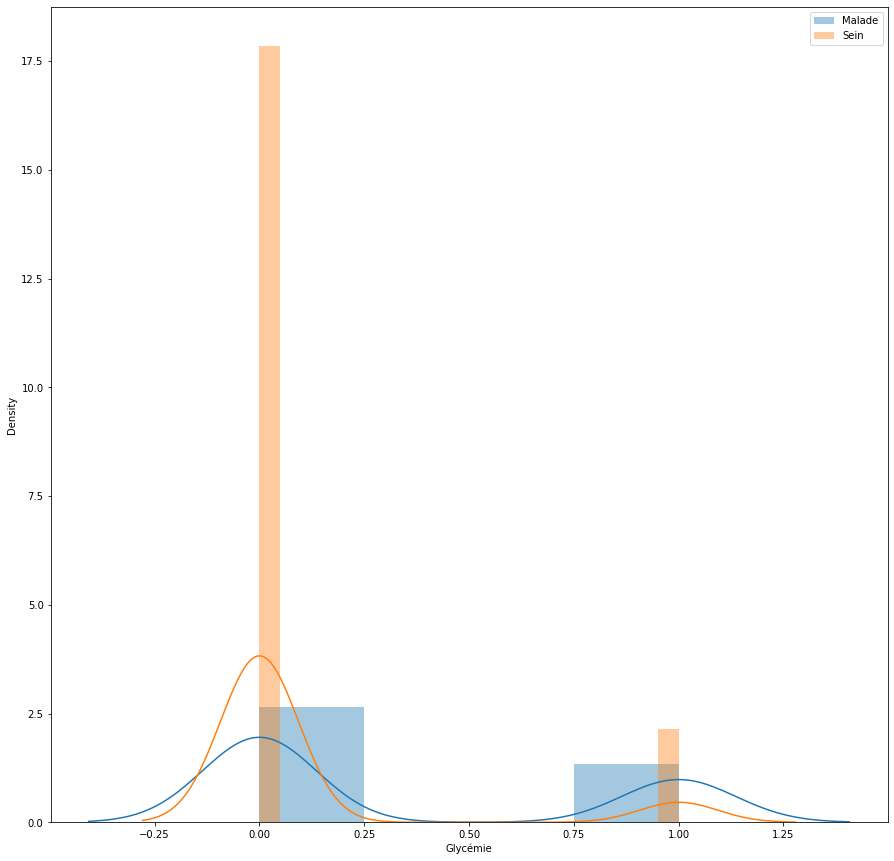

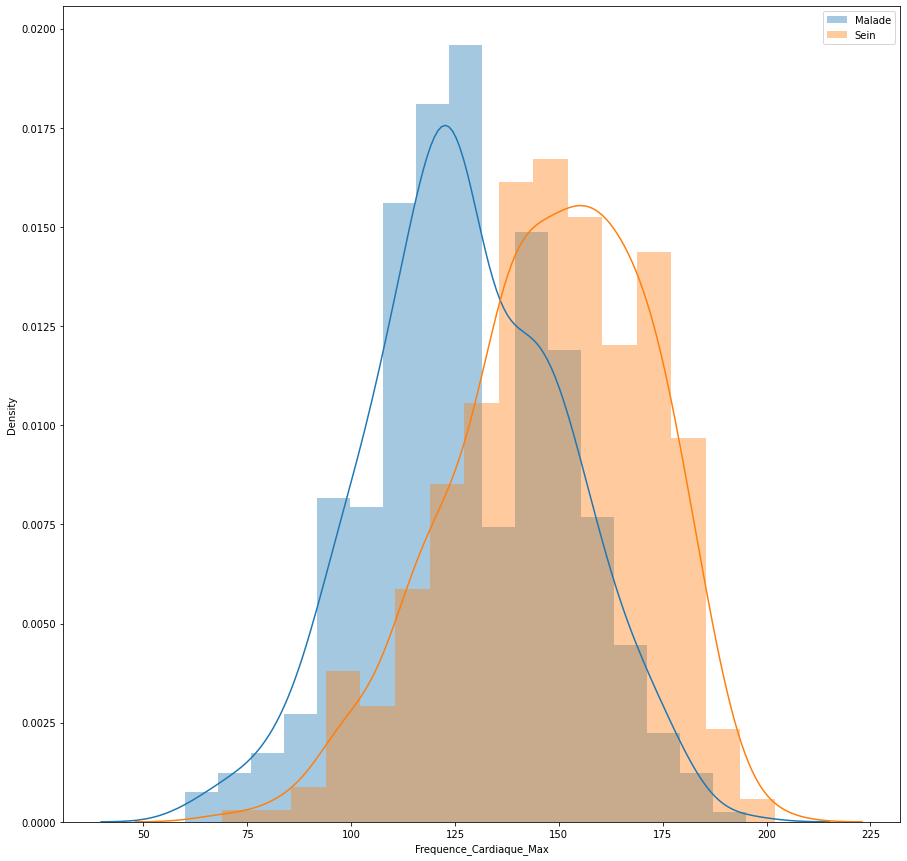

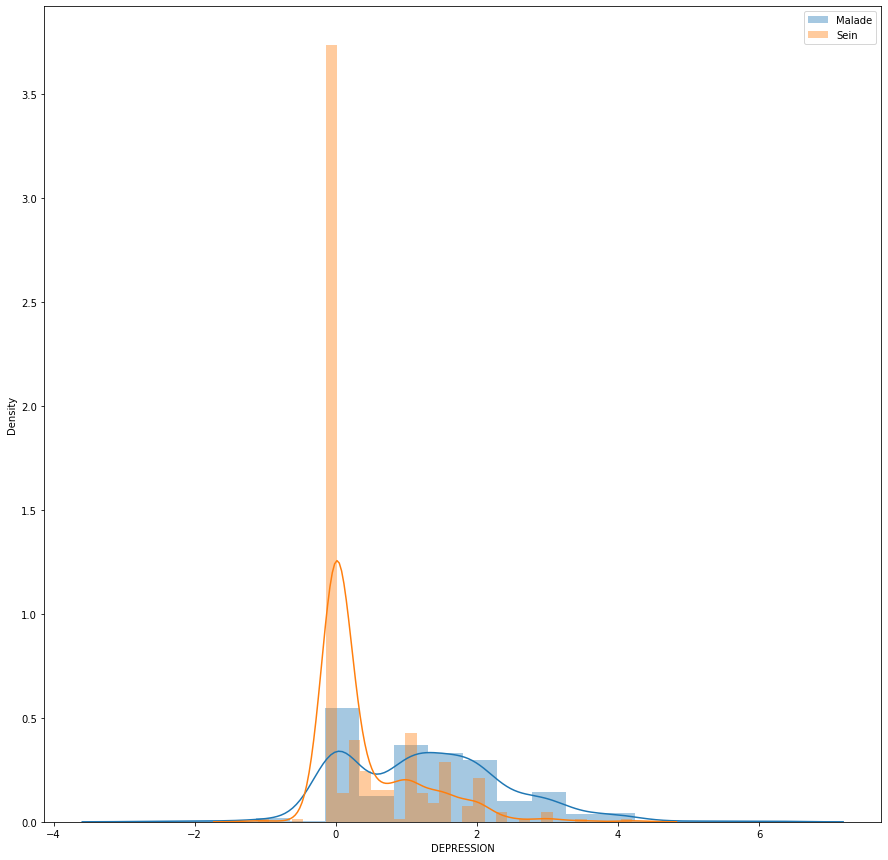

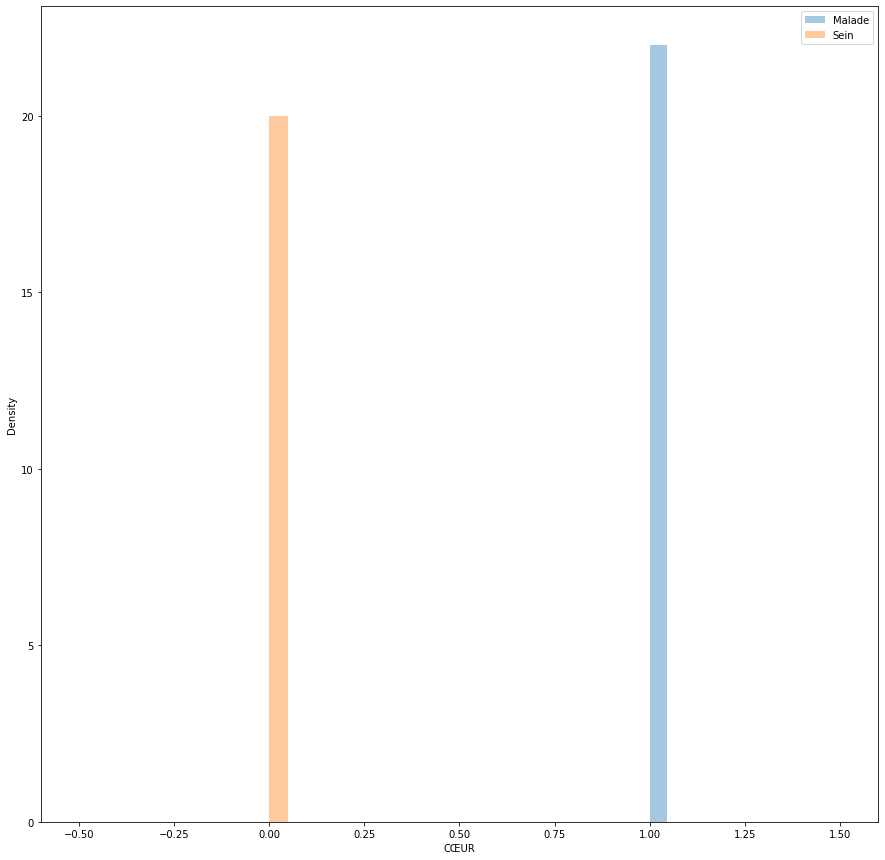

In [29]:
for col in Data_Quanti.columns:
    plt.figure()
    sns.distplot(Malade_df[col], label='Malade')
    sns.distplot(Sein_df[col], label='Sein')
    plt.legend()
    

### Visualisons la rélation entre les variables qualitatives et la variable cible

Text(0.5, 1.0, 'PENTE & CŒUR')

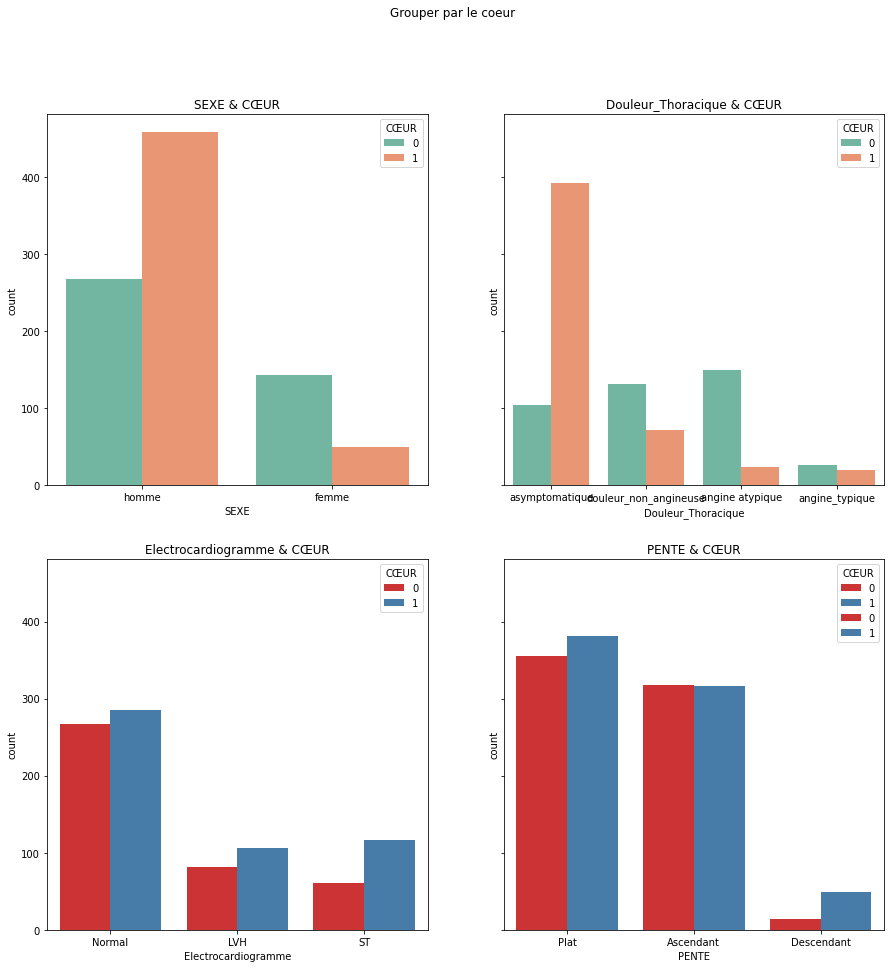

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Grouper par le coeur')
sns.countplot(x="SEXE", hue = "CŒUR",  data=df, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("SEXE & CŒUR")

sns.countplot(x="Douleur_Thoracique", hue = "CŒUR",  data=df, ax=axes[0,1], palette="Set2",order=df["Douleur_Thoracique"].value_counts().index)
axes[0,1].set_title("Douleur_Thoracique & CŒUR")

sns.countplot(x="Electrocardiogramme", hue = "CŒUR",  data=df, ax=axes[1,0], palette="Set1",order=df["Electrocardiogramme"].value_counts().index)
axes[1,0].set_title("Electrocardiogramme & CŒUR")

sns.countplot(x="ANGINE", hue = "CŒUR",  data=df, ax=axes[1,1], palette="Set1",order=df["ANGINE"].value_counts().index)
axes[1,1].set_title("ANGINE & CŒUR")

sns.countplot(x="PENTE", hue = "CŒUR",  data=df, ax=axes[1,1], palette="Set1",order=df["PENTE"].value_counts().index)
axes[1,1].set_title("PENTE & CŒUR")

## Contexte
- Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui represente 31% de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. 
- L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.
- Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d un ou plusieurs facteurs de risque tels que l hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d une détection et d une gestion précoces dans lesquelles un modèle d apprentissage automatique peut être d une grande aide.

## Objectif :
- Comprendre du mieux possible nos données 
- Utiliser différentes techniques d'analyse de données et machine learning pour faire la prédiction d'une maladie cardiaque chez un patient.

## Checklist de base
#### Analyse de Forme :
- **variable target** : coeur

- Le contexte du projet nous dit qu'un tier des maladies cardio vasculaires subviennent chez les personnes de moins de 70 ans ( c'est une hypothèse que nous allons vérifiée plutard)

- **Renommage des variables** :  Nous avons renommer nos variables ainsi que les modalités pour mieux les comprendre.

- **lignes et colonnes** : 918 lignes, 12 colonnes signifiant qu'il y a 918 enrégistrements de clients sur 12 caractéristiques.

- **types de variables** : A l'affichage des informations du dataset, on remarque qu'il y a, à priori, des variables de type int64(6), float64(1) et object(5)

- **Existe t-il des valeurs manquantes ?** : Notre jeu de données ne comportent aucune donnée manquante. 

- **Existe t-il des valeurs dupliquées ?** : Il n'y a pas de valeurs dupliquées

- **Existe t-il des valeurs constantes ?** : Il n'y a pas de valeurs constantes.

- Séparons nos variables quantitatives et qualitatives

- **Distribution des variables quantitatives** : 
* A vue d'oeil,nous remarquons que les différentes variables sont mal distribuées et ne respecte pas de loi normal. Fesons un test de shapiro-wilk pour vérifier cette hypothèse. 
* Le test montre que ses deux variables ('CHOLESTEROL' et 'DEPRESSION') ne suivent pas une distribution normale. 

- **Visualisation des variables qualitatives** : Nous remarquons qu'il y a dans notre dataset:
* Plus d'hommes (79%) que de femmes (21%)
* Plus de patient ayant une douleur thoracique de type asymptomatique(54%), que d'autres types de patient ayant d'autres types de douleurs .La présence d'angine est-elle un facteur qui cause la maladie cardiaque ?
* La pente du segment ST est le plus souvent Plat (50.1%) que Ascendant(43%) et que Descendant(6,9%). Y a t'il un facteur qui influe sur cette variable ? Est-elle une variable importante vis à vis de la variable cible ?
* L'électrocardiogramme au repos est le plus souvent normal chez le patient.
* Moins de patient ayant une angine induite par l'exercise(40,4%)que ceux ayant une angine non induite par l'exercise.
* La pente du segment ST d'exercice de pointe est le plus souvent plat chez le patient.

- **Visualisation des variables Quantitatives-Quantitatives**: Les différentes répresentations montrent qu'il n'y a pas une rélation linéaire entre nos variables quantitatives. Mais alors, quelle est la rélation qui lit nos variables ? 

- **Visualisation des variables Quantitatives-Qualitatives**: Ici, voyons l'impacte de l'age sur les caractéristiques observées chez le patient.
* On observe que dans notre dataset, que l'age est une variable significative, plus le patient est agé, plus il a de chance de contracter une douleur ou un symptome. Nous allons plutard appronfondir cette hypothèse.
* On observe également que la depression

- **Visualisation de la variable cible** : On observe que notre variable ne suis pas une loie normale. Il y a plus de patients n'ayant pas de maladie cardiaque que de patients ayant une maladie cardiaque.

- **Visualisation des variables Quantitatives - Variables Cibles** : Il semble que les variables AGE, Pression_Arterielle, CHOLESTEROL, Gycémie,DEPRESSION semblent liées à la maladie.Ce sont des hypothèses à vérifier.

- **Visualisation Qualitatives - Variable Cible :** La visualisation de ses graphiques nous apprends que : 
* Les hommes sont plus atteints par le cancer que les femmes
* Les patients ayant un cancer on une forte quantité de douleur asymptomatique.
* Les patients ayant une anomalie de l'onde ST-T sont plus propice à la maladie.
* Les patients ayant une pente de type Descendant ont une forte chance d'etre malade








